In [199]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df1=pd.read_csv('datafile.csv')

In [200]:
df1.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1901,34.7,38.6,17.8,38.9,50.6,113.2,241.4,271.6,124.7,52.4,38.7,8.2,1030.8,73.2,107.3,751.0,99.3
1,1902,7.4,4.2,19.0,44.1,48.8,111.7,284.9,201.0,200.2,62.5,29.4,25.2,1038.4,11.6,111.9,797.8,117.2
2,1903,16.7,8.0,31.1,17.1,59.5,120.3,293.2,274.0,198.1,119.5,40.3,18.0,1195.9,24.7,107.7,885.6,177.8
3,1904,14.9,9.7,31.4,33.7,73.8,165.5,260.3,207.7,130.8,69.8,11.2,16.4,1025.1,24.5,138.8,764.3,97.4
4,1905,24.7,20.3,41.8,33.8,55.8,93.7,253.0,201.7,178.1,54.9,9.6,10.1,977.5,45.0,131.4,726.4,74.7


In [201]:
df1.drop("ANN",axis=1,inplace=True)
df1.drop("Jan-Feb",axis=1,inplace=True)
df1.drop("Mar-May",axis=1,inplace=True)
df1.drop("Jun-Sep",axis=1,inplace=True)
df1.drop("Oct-Dec",axis=1,inplace=True)

In [202]:
df1.columns = ['Year',1,2,3,4,5,6,7,8,9,10,11,12]

In [203]:
df1.dropna(inplace=True)

In [204]:
df = pd.melt(df1, id_vars=["Year",], var_name="Month", value_name="Rainfall")
df = df2.sort_values(["Year","Month"])

In [205]:
df['Rainfall']=df['Rainfall'].round()

In [206]:
train = df.loc[df['Year'] >= 2007]
test = df.loc[df['Year'] == 2013]

In [207]:
X_train=train
X_train=X_train[X_train['Year'] != 2013]
Y_train=X_train['Rainfall']
X_train.drop('Rainfall',axis=1)

,Year,Month
106,2007,1
219,2007,2
332,2007,3
445,2007,4
558,2007,5
671,2007,6
784,2007,7
897,2007,8
1010,2007,9
1123,2007,10


In [208]:
Y_train

106       2.0
219      37.0
332      35.0
445      31.0
558      47.0
671     192.0
784     286.0
897     257.0
1010    207.0
1123     56.0
1236     14.0
1349     15.0
107      18.0
220      19.0
333      41.0
446      30.0
559      44.0
672     202.0
785     245.0
898     266.0
1011    165.0
1124     52.0
1237     26.0
1350     11.0
108      12.0
221      12.0
334      14.0
447      25.0
560      56.0
673      86.0
        ...  
787     301.0
900     275.0
1013    198.0
1126     69.0
1239     61.0
1352     23.0
110       7.0
223      26.0
336      22.0
449      41.0
562      53.0
675     184.0
788     246.0
901     285.0
1014    187.0
1127     38.0
1240     20.0
1353      8.0
111      26.0
224      13.0
337      11.0
450      48.0
563      32.0
676     118.0
789     250.0
902     262.0
1015    194.0
1128     59.0
1241     31.0
1354     12.0
Name: Rainfall, Length: 72, dtype: float64

In [209]:
X_test=test
Y_test=test['Rainfall']

In [210]:
from sklearn import svm
from sklearn.svm import SVC
model = svm.SVC(gamma='auto',kernel='linear')
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [211]:
Y_pred = model.predict(X_test)

In [212]:
df1 = pd.DataFrame({'Actual Rainfall': Y_test, 'Predicted Rainfall': Y_pred})  
df1[df1['Predicted Rainfall']!=0].head(10)

,Actual Rainfall,Predicted Rainfall
112,11.0,11.0
225,40.0,41.0
338,16.0,17.0
451,30.0,32.0
564,58.0,59.0
677,220.0,207.0
790,310.0,301.0
903,255.0,250.0
1016,153.0,165.0
1129,129.0,138.0


In [213]:
Y_test1=test['Rainfall']

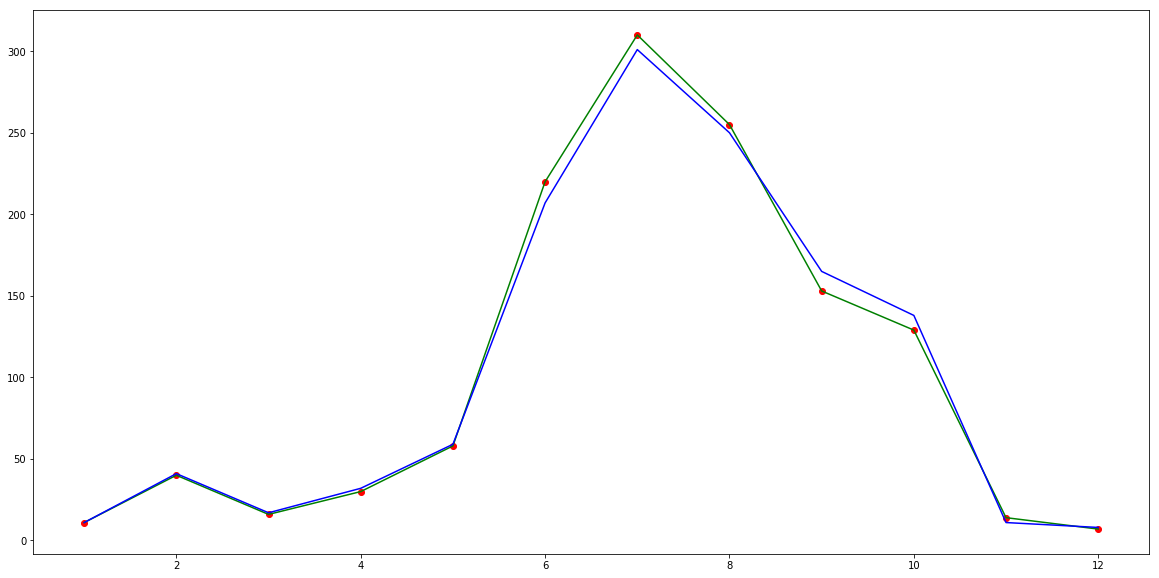

In [215]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Month'],Y_test1,color='red')
plt.plot(X_test['Month'],Y_test,color='green')
plt.plot(X_test['Month'],Y_pred,color='blue')

In [220]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0

In [222]:
print(metrics.accuracy_score(Y_pred, Y_test) * 100)

8.333333333333332


In [173]:
from sklearn.svm import SVR
regressor=SVR(gamma='scale',kernel='linear')
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)

In [174]:
df1 = pd.DataFrame({'Actual Rainfall': Y_test, 'Predicted Rainfall': Y_pred})  
df1[df1['Predicted Rainfall']>=1].head(10)

,Actual Rainfall,Predicted Rainfall
112,11.0,11.098210
225,40.0,40.078592
338,16.0,16.095035
451,30.0,30.085623
564,58.0,58.066685
677,220.0,219.956573
790,310.0,309.895449
903,255.0,254.932985
1016,153.0,153.002501
1129,129.0,129.018944


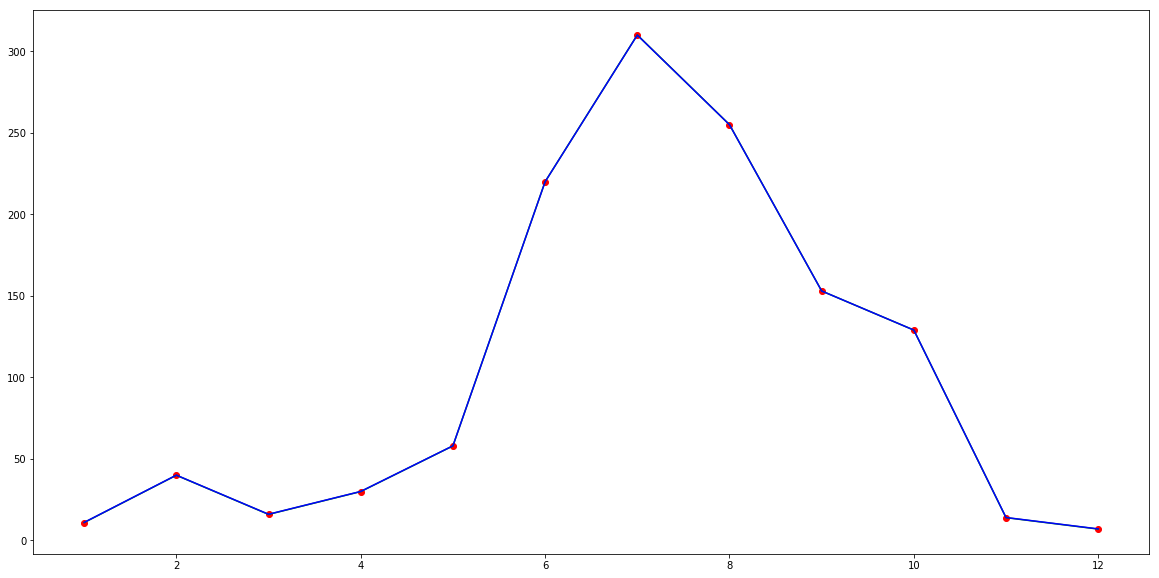

In [176]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Month'],Y_test1,color='red')
plt.plot(X_test['Month'],Y_test,color='green')
plt.plot(X_test['Month'],Y_pred,color='blue')

In [177]:
from sklearn.neighbors import KNeighborsClassifier
neig = KNeighborsClassifier(n_neighbors=1)
neig.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [178]:
Y_pred = neig.predict(X_test)

In [179]:
df1 = pd.DataFrame({'Actual Rainfall': Y_test, 'Predicted Rainfall': Y_pred})  
df1[df1['Predicted Rainfall']>=1].head(10)

,Actual Rainfall,Predicted Rainfall
112,11.0,11.0
225,40.0,41.0
338,16.0,17.0
451,30.0,32.0
564,58.0,56.0
677,220.0,207.0
790,310.0,301.0
903,255.0,250.0
1016,153.0,165.0
1129,129.0,138.0


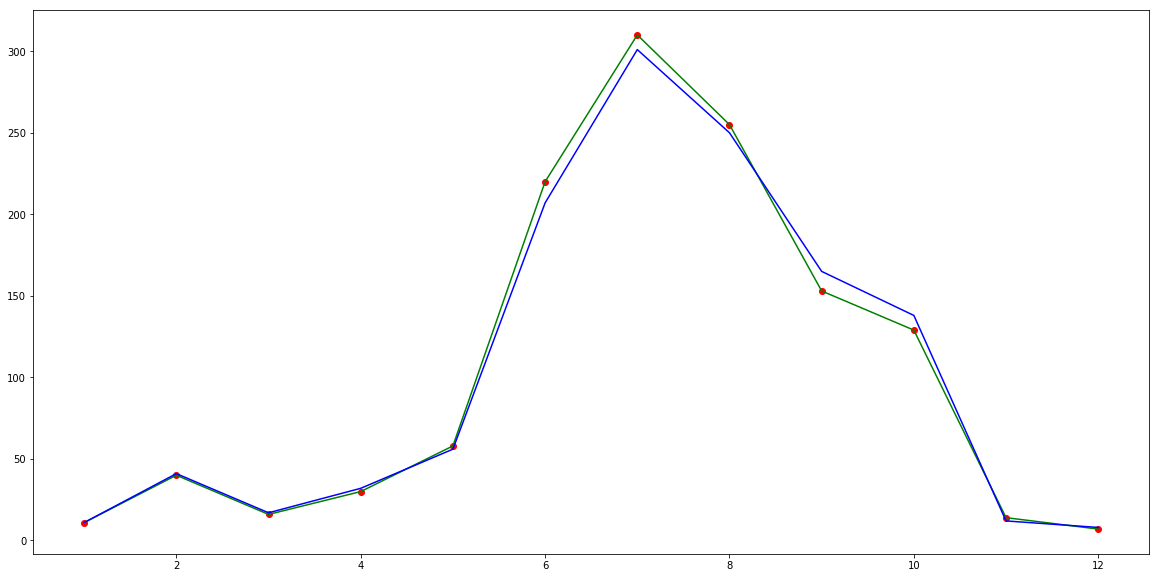

In [181]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Month'],Y_test1,color='red')
plt.plot(X_test['Month'],Y_test,color='green')
plt.plot(X_test['Month'],Y_pred,color='blue')

In [195]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,Y_train)

/home/arnav/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [196]:
Y_pred = mlp.predict(X_test)

In [197]:
df1 = pd.DataFrame({'Actual Rainfall': Y_test, 'Predicted Rainfall': Y_pred})  
df1[df1['Predicted Rainfall']>=1].head(10)

,Actual Rainfall,Predicted Rainfall
112,11.0,11.0
225,40.0,11.0
338,16.0,11.0
451,30.0,11.0
564,58.0,56.0
677,220.0,192.0
790,310.0,286.0
903,255.0,192.0
1016,153.0,187.0
1129,129.0,187.0


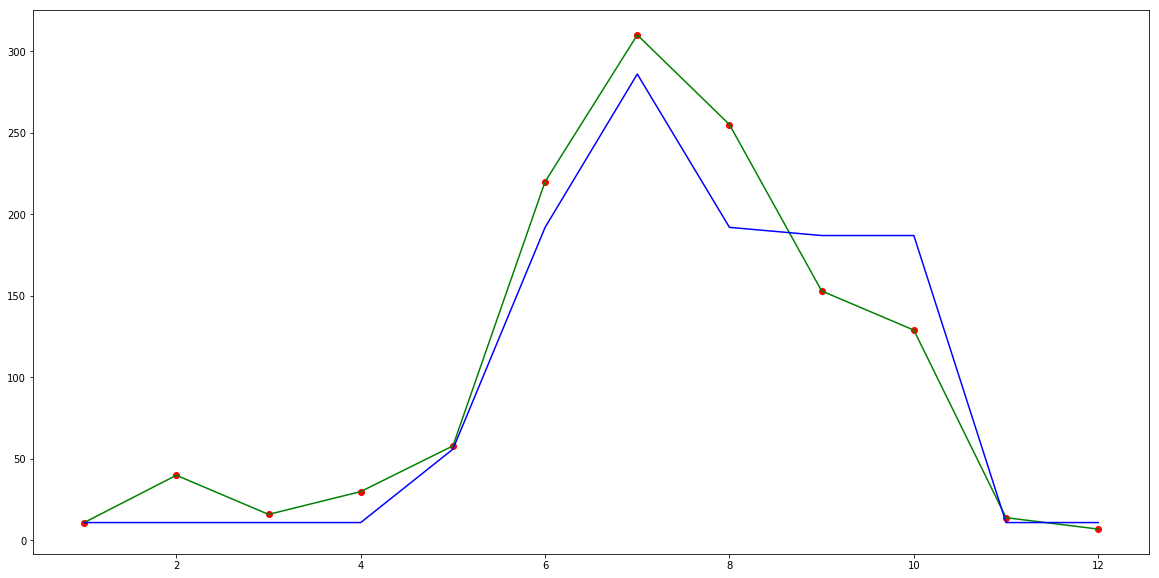

In [198]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Month'],Y_test1,color='red')
plt.plot(X_test['Month'],Y_test,color='green')
plt.plot(X_test['Month'],Y_pred,color='blue')